In [31]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

matplotlib.rc("font", family="NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

%matplotlib inline

In [3]:
df = pd.read_csv('/home/piai/2. Big Data 분석/NewCarexc.csv', index_col=0)
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,Volkswagen
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,Volkswagen
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,Nissan
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5.0,Volkswagen


In [4]:
df.isnull().sum()

Name                    0
Location                0
Price                1014
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)           0
Engine(CC)              0
Power(bhp)              0
Seats                   0
Brand                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7035 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7035 non-null   object 
 1   Location           7035 non-null   object 
 2   Price              6021 non-null   float64
 3   Year               7035 non-null   int64  
 4   Kilometers_Driven  7035 non-null   int64  
 5   Fuel_Type          7035 non-null   object 
 6   Transmission       7035 non-null   object 
 7   Owner_Type         7035 non-null   object 
 8   Mileage(km/l)      7035 non-null   float64
 9   Engine(CC)         7035 non-null   int64  
 10  Power(bhp)         7035 non-null   float64
 11  Seats              7035 non-null   float64
 12  Brand              7035 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 769.5+ KB


In [6]:
df_Price_exc = df[df['Price'].isnull()]
df_Price_exc

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand
6019,Maruti Alto K10 LXI CNG,Delhi,NaN,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,Maruti
6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,NaN,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5.0,Maruti
6023,Hyundai i20 Magna,Mumbai,NaN,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5.0,Hyundai
6024,Mahindra XUV500 W8 2WD,Coimbatore,NaN,2016,85609,Diesel,Manual,Second,16.00,2179,140.00,7.0,Mahindra
6025,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,NaN,2015,59000,Diesel,Automatic,First,12.55,2982,168.70,7.0,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,Volkswagen
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,Volkswagen
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,Nissan
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5.0,Volkswagen


In [7]:
df_Price_inc = df[df['Price'].isnull() == False]
df_Price_inc
# Price 결측치 제외한 데이터만 추출 --> 모델 만들어서 성능 비교 위해

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047,69.00,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497,121.36,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368,160.00,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248,88.50,5.0,Maruti


In [8]:
# 고유값들인 Name 데이터를 제거함
df_Price_inc.drop('Name', axis=1, inplace=True)
df_Price_inc

/tmp/ipykernel_11614/2856191440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Price_inc.drop('Name', axis=1, inplace=True)


,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047,69.00,5.0,Tata
7231,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497,121.36,5.0,Ford
7232,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368,160.00,5.0,Jeep
7235,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248,88.50,5.0,Maruti


In [9]:
# 범주형 변수를 더미변수로 만듬
df_Price_inc = pd.get_dummies(df_Price_inc)
df_Price_inc

,Price,Year,Kilometers_Driven,Mileage(km/l),Engine(CC),Power(bhp),Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2682.68,2010,72000,26.60,998,58.16,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19162.00,2015,41000,19.67,1582,126.20,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6898.32,2011,46000,18.20,1199,88.70,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9197.76,2012,87000,20.77,1248,88.76,7.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,27194.71,2013,40670,15.20,1968,140.80,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,10822.70,2016,41413,27.28,1047,69.00,5.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7231,13474.72,2017,39015,17.00,1497,121.36,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7232,27838.55,2018,6000,16.00,1368,160.00,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7235,16203.39,2017,21380,24.30,1248,88.50,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 목표변수, 설명변수 분리
df_y = df_Price_inc["Price"]
df_x = df_Price_inc.drop("Price", axis=1, inplace=False)

In [11]:
# 데이터를 7:3으로 나눔 --> train data & test data
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))


train data X size: (4214, 56)
train data Y size: (4214,)
test data X size: (1807, 56)
test data Y size: (1807,)


In [12]:
#기본 모델 생성
dt_uncust = DecisionTreeRegressor(random_state=1234)
dt_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(dt_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(dt_uncust.score(df_test_x, df_test_y)))

Score on training set 1.000
Score on test set 0.692


In [13]:
#기본 모델 생성
rf_uncust = RandomForestRegressor(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Score on training set 0.981
Score on test set 0.840


- train 성능 = 0.981, test 성능 = 0.84
- train data 과대적합

In [14]:
rf_uncust.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [15]:
#기본 모델 생성
gb_uncust = GradientBoostingRegressor(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))

Score on training set 0.919
Score on test set 0.842


In [16]:
#기본 모델 생성
xgb_uncust = XGBRegressor(random_state=1234)
xgb_uncust.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(xgb_uncust.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(xgb_uncust.score(df_test_x, df_test_y)))

Score on training set 0.993
Score on test set 0.854


In [17]:
xgb_uncust.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

- DecisionTree, RandomForest, GradientBoosting, XGBRegressor 4가지 모델을
- 파라미터를 별도로 설정하지 않고 기본으로 돌렸을 때
- XGB가 Train 성능도 우수하고 Test 성능이 가장 우수하였다.
- XGB 선택!

In [18]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TestScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

KeyboardInterrupt: 

In [19]:
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]
para_leaf = [n_leaf for n_leaf in range(1,21)]

para_split = [n_split * 2 for n_split in range(2,21)]

para_depth = [depth for depth in range(1,15)]

para_lr = [lr * 0.1 for  lr in range(1,10)]

para_hidden = [(hidden, hidden) for hidden in range(10,110, 10)]

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
estimator = XGBRegressor(random_state=1234)

param_grid = {"n_estimators": para_n_tree, "max_depth": para_depth, "learning_rate": para_lr,
             "min_child_weight": para_leaf}
grid_xgb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_xgb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_xgb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_xgb.best_params_))
print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))

best estimator model: 
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=1234, ...)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 90}

best score: 
0.877


In [21]:
# XGB 모델의 세부 파라미터를 정하기 위해 GridSearchCV로 구함
# {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 90}

In [22]:
xgb= XGBRegressor(learning_rate= 0.2, max_depth= 4, min_child_weight= 5, n_estimators= 90,
                          random_state=1234)
xgb.fit(df_train_x, df_train_y)

print("Score on training set {:.3f}".format(xgb.score(df_train_x, df_train_y)))
print("Score on test set {:.3f}".format(xgb.score(df_test_x, df_test_y)))

Score on training set 0.951
Score on test set 0.856


In [23]:
# Train 성능은 소폭 감소하였다.
# Test 성능은 Default 조건일 떄보다 소폭 증가하였다.

Feature Importance:
                      Feature  Importance
4                  Power(bhp)    0.300707
0                        Year    0.112615
21     Transmission_Automatic    0.059280
37              Brand_Hyundai    0.052375
18           Fuel_Type_Diesel    0.045367
45        Brand_Mercedes-Benz    0.043776
42                 Brand_Land    0.036418
46                 Brand_Mini    0.033570
28                 Brand_Audi    0.032887
11         Location_Hyderabad    0.032821
5                       Seats    0.032010
53               Brand_Toyota    0.024933
3                  Engine(CC)    0.024736
36                Brand_Honda    0.024166
1           Kilometers_Driven    0.017953
49              Brand_Porsche    0.012446
39               Brand_Jaguar    0.012353
10             Location_Delhi    0.011425
2               Mileage(km/l)    0.011162
9         Location_Coimbatore    0.009916
52                 Brand_Tata    0.008570
29                  Brand_BMW    0.006856
8            L

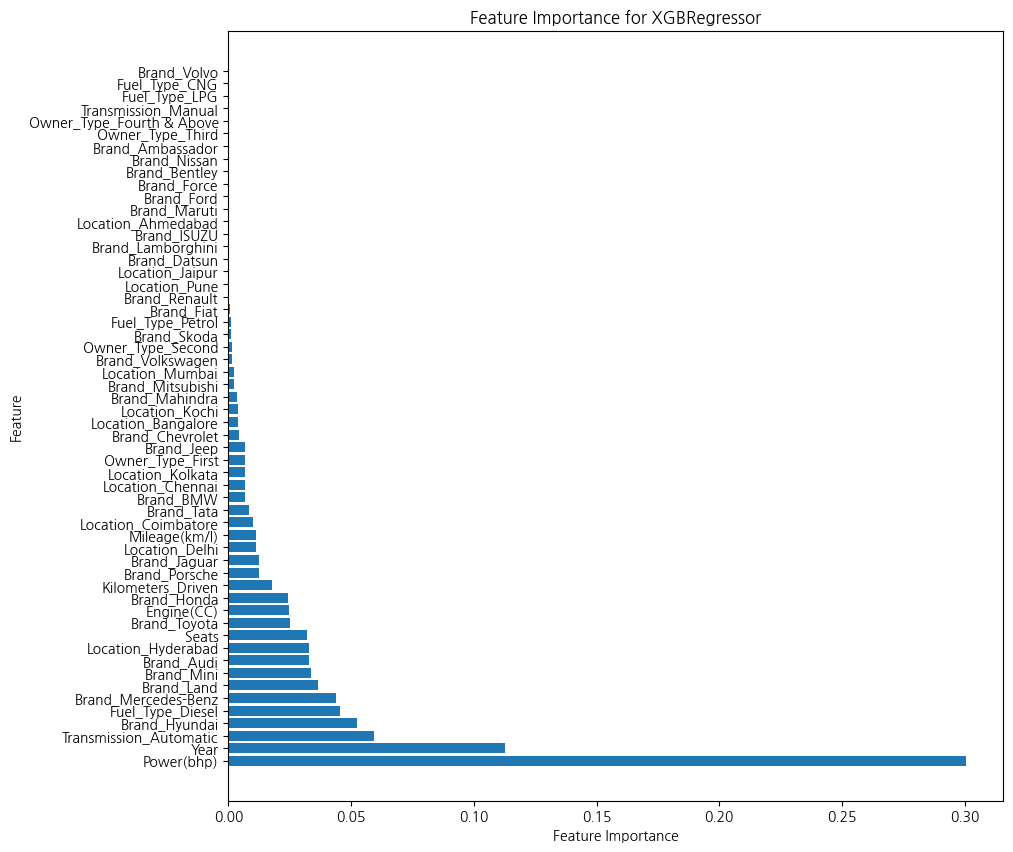

In [35]:

xgb = XGBRegressor(learning_rate= 0.2, max_depth= 4, min_child_weight= 5, n_estimators= 90,
                          random_state=1234)
xgb.fit(df_train_x, df_train_y)

# 피처 중요도 계산
feature_importances = xgb.feature_importances_

# 중요도를 데이터프레임으로 정리 (피처명과 함께)
feature_importance_df = pd.DataFrame({'Feature': df_train_x.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도를 출력
print("Feature Importance:")
print(feature_importance_df)

# 중요도를 시각화 (옵션)
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBRegressor')
plt.show()


In [51]:
# 중요한 피처 선택
threshold = 0.007  # 임계값을 적절히 설정
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# 중요한 피처만을 포함하는 데이터프레임 갱신
df_train_x_important = df_train_x[important_features]
df_test_x_important = df_test_x[important_features]


In [76]:
xgb = XGBRegressor(learning_rate= 0.2, max_depth= 4, min_child_weight= 4, n_estimators= 100,
                          random_state=1234)
xgb.fit(df_train_x_important, df_train_y)

print("Score on training set {:.3f}".format(xgb.score(df_train_x_important, df_train_y)))
print("Score on test set {:.3f}".format(xgb.score(df_test_x_important, df_test_y)))

Score on training set 0.957
Score on test set 0.868


- DecisionTree, RandomForest, GradientBoosting, XGBRegressor 모델 성능을 시각화 해보자!

In [24]:
models = ["의사결정나무", "랜덤포레스트", "그래디언트 부스팅", "XGBoost"]

mse, rmse, mae, mape = [],[],[],[]

train_accuracy = []; test_accuracy = []

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

dt_final = DecisionTreeRegressor(max_depth=11, min_samples_split=16,
                                 min_samples_leaf=2, random_state=1234)
dt_final.fit(df_train_x, df_train_y)

train_accuracy.append(dt_final.score(df_train_x, df_train_y))
test_accuracy.append(dt_final.score(df_test_x, df_test_y))

dt_y_pred = dt_final.predict(df_test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 평균 제곱 오차 (Mean Squared Error)
mse_dt = mean_squared_error(df_test_y, dt_y_pred)
print("Mean Squared Error (MSE):", mse_dt)
mse.append(mse_dt)

# 평균 절대 오차 (Mean Absolute Error)
mae_dt = mean_absolute_error(df_test_y, dt_y_pred)
print("Mean Absolute Error (MAE):", mae_dt)
mae.append(mae_dt)

# 제곱 평균 오차 (Root Mean Absolute Error)
rmse_dt = mean_squared_error(df_test_y, dt_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_dt)
rmse.append(rmse_dt)

# 평균 절대 백분율 오차 (Mean Absolute Percentage Error)
mape_dt = np.mean(np.abs((df_test_y - dt_y_pred) / df_test_y)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape_dt)
mape.append(mape_dt)

# R-squared (결정 계수)
from sklearn.metrics import r2_score
r2 = r2_score(df_test_y, dt_y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 69083255.64290868
Mean Absolute Error (MAE): 3392.041149783799
Root Mean Squared Error (RMSE): 8311.633752933816
Mean Absolute Percentage Error (MAPE): 99.538416826873
R-squared (R2): 0.7846952761481316


In [26]:
rf_final = RandomForestRegressor(random_state=1234)
rf_final.fit(df_train_x, df_train_y)

train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

rf_y_pred = rf_final.predict(df_test_x)

# 평균 제곱 오차 (Mean Squared Error)
mse_rf = mean_squared_error(df_test_y, rf_y_pred)
print("Mean Squared Error (MSE):", mse_rf)
mse.append(mse_rf)

# 평균 절대 오차 (Mean Absolute Error)
mae_rf = mean_absolute_error(df_test_y, rf_y_pred)
print("Mean Absolute Error (MAE):", mae_rf)
mae.append(mae_rf)

# 제곱 평균 오차 (Root Mean Absolute Error)
rmse_rf = mean_squared_error(df_test_y, rf_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_rf)
rmse.append(rmse_rf)

# 평균 절대 백분율 오차 (Mean Absolute Percentage Error)
mape_rf = np.mean(np.abs((df_test_y - rf_y_pred) / df_test_y)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape_rf)
mape.append(mape_rf)

# R-squared (결정 계수)
from sklearn.metrics import r2_score
r2 = r2_score(df_test_y, dt_y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 51473161.47978883
Mean Absolute Error (MAE): 2743.208650159828
Root Mean Squared Error (RMSE): 7174.4798752096885
Mean Absolute Percentage Error (MAPE): 99.90754956602272
R-squared (R2): 0.7846952761481316


In [27]:
gb_final = GradientBoostingRegressor(random_state=1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

gb_y_pred = gb_final.predict(df_test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 평균 제곱 오차 (Mean Squared Error)
mse_gb = mean_squared_error(df_test_y, gb_y_pred)
print("Mean Squared Error (MSE):", mse_gb)
mse.append(mse_gb)

# 평균 절대 오차 (Mean Absolute Error)
mae_gb = mean_absolute_error(df_test_y, gb_y_pred)
print("Mean Absolute Error (MAE):", mae_gb)
mae.append(mae_gb)

# 제곱 평균 오차 (Root Mean Absolute Error)
rmse_gb = mean_squared_error(df_test_y, gb_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_gb)
rmse.append(rmse_gb)

# 평균 절대 백분율 오차 (Mean Absolute Percentage Error)
mape_gb = np.mean(np.abs((df_test_y - gb_y_pred) / df_test_y)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape_gb)
mape.append(mape_gb)

# R-squared (결정 계수)
from sklearn.metrics import r2_score
r2 = r2_score(df_test_y, dt_y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 50696631.58745658
Mean Absolute Error (MAE): 3055.3444170589346
Root Mean Squared Error (RMSE): 7120.156710877688
Mean Absolute Percentage Error (MAPE): 107.94026803484329
R-squared (R2): 0.7846952761481316


In [28]:
xgb_final = XGBRegressor(learning_rate= 0.2, max_depth= 4, min_child_weight= 5, n_estimators= 90,
                         random_state=1234)
xgb_final.fit(df_train_x, df_train_y)

train_accuracy.append(xgb_final.score(df_train_x, df_train_y))
test_accuracy.append(xgb_final.score(df_test_x, df_test_y))

xgb_y_pred = xgb_final.predict(df_test_x)


# 평균 제곱 오차 (Mean Squared Error)
mse_xgb = mean_squared_error(df_test_y, xgb_y_pred)
print("Mean Squared Error (MSE):", mse_xgb)
mse.append(mse_xgb)

# 평균 절대 오차 (Mean Absolute Error)
mae_xgb = mean_absolute_error(df_test_y, xgb_y_pred)
print("Mean Absolute Error (MAE):", mae_xgb)
mae.append(mae_xgb)

# 제곱 평균 오차 (Root Mean Absolute Error)
rmse_xgb = mean_squared_error(df_test_y, xgb_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
rmse.append(rmse_xgb)

# 평균 절대 백분율 오차 (Mean Absolute Percentage Error)
mape_xgb = np.mean(np.abs((df_test_y - xgb_y_pred) / df_test_y)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape_xgb)
mape.append(mape_xgb)

# R-squared (결정 계수)
from sklearn.metrics import r2_score
r2 = r2_score(df_test_y, dt_y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 46110682.40743784
Mean Absolute Error (MAE): 2697.9827600246276
Root Mean Squared Error (RMSE): 6790.48469606094
Mean Absolute Percentage Error (MAPE): 105.25034298216349
R-squared (R2): 0.7846952761481316


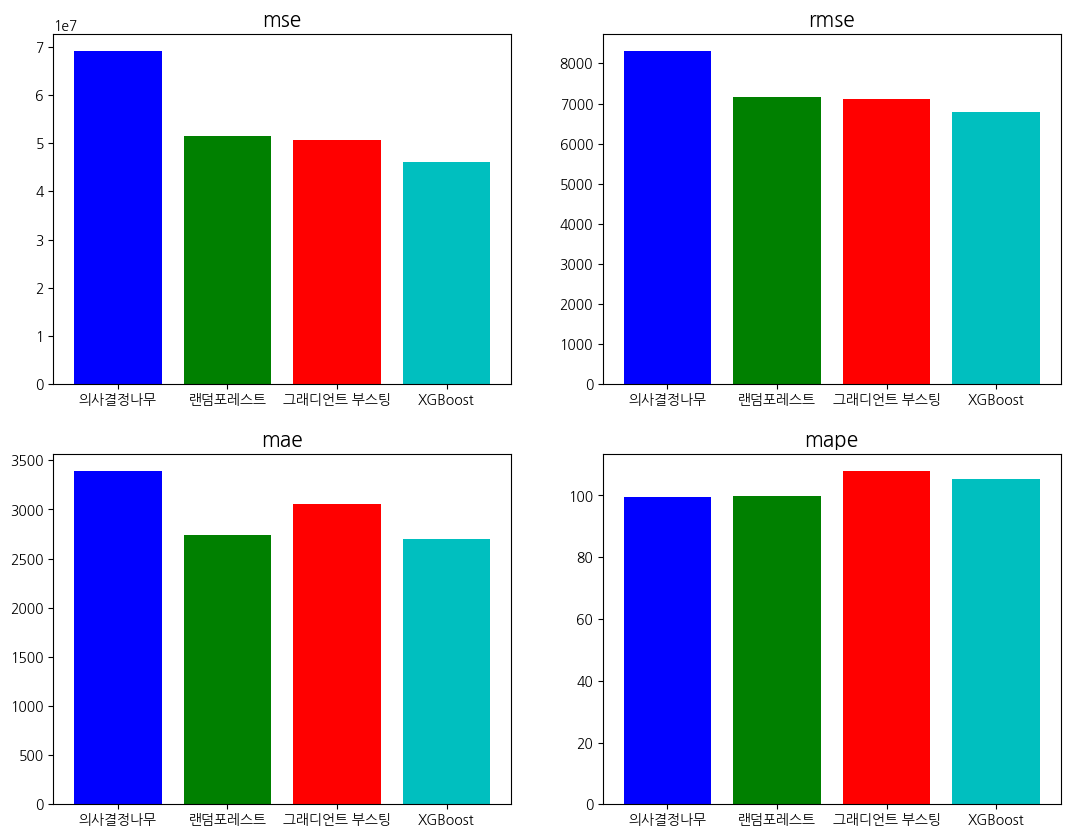

In [32]:
# matplotlib.rc("font", family="NanumGothic")
# matplotlib.rc("axes", unicode_minus=False)

fig, ax = plt.subplots(2, 2, figsize=(13, 10))

# 각 모델에 대한 색상 지정
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax[0, 0].bar(models, mse, color=colors)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse, color=colors)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae, color=colors)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape, color=colors)
ax[1, 1].set_title("mape").set_fontsize(15)


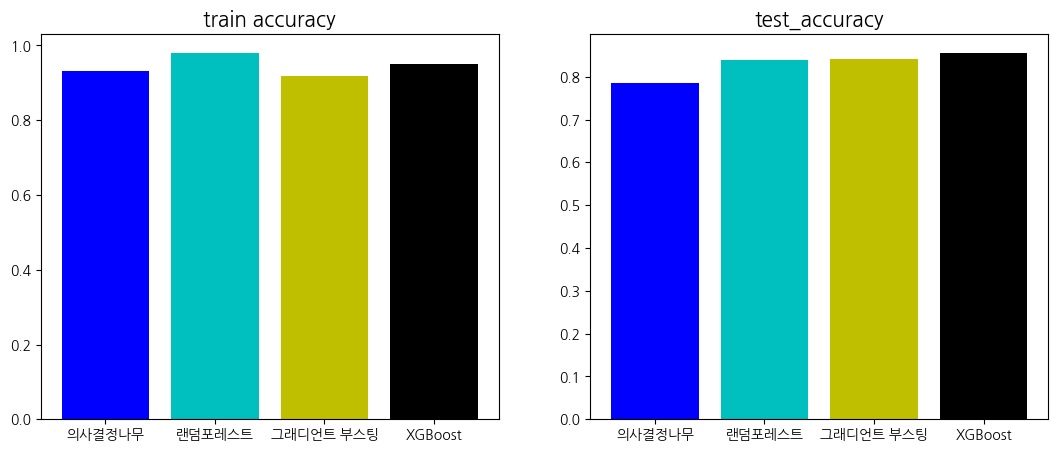

In [33]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

colors = ['b', 'c', 'y', 'k']

ax[0].bar(models, train_accuracy, color=colors)
ax[0].set_title("train accuracy").set_fontsize(15)

ax[1].bar(models, test_accuracy, color=colors)
ax[1].set_title("test_accuracy").set_fontsize(15)

## 결론
- train 성능은 RandomForest 모델이 가장 좋았다.
- 다만 Train 성능이 높을수록 좋지만 너무 높으면 과적합될 확률이 높다
- 두 번쨰로 높은 건 XGBoost이다.
- test 성능은 xgboost가 가장 좋았다.
- 결론적으로 train 성능은 과적합을 피하고 test 성능은 가장 좋아서 이상적인 모델이라고 할 수 있다

In [ ]:
# estimator = DecisionTreeRegressor(random_state=1234)

# param_grid = {"min_samples_split": para_split, "max_depth": para_depth,
#              "min_samples_leaf": para_leaf}
# grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_dt.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_dt.best_params_))
# print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=16,
                      random_state=1234)

best parameter: 
{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 16}

best score: 
0.829


In [ ]:
# DecisionTree
# {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 16}

# xgboost
# {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 90}

In [ ]:
dt_final = DecisionTreeRegressor(max_depth= 11, min_samples_leaf= 2, min_samples_split= 16, random_state=1234)
dt_final.fit(df_train_x, df_train_y)

train_accuracy.append(dt_final.score(df_train_x, df_train_y))
test_accuracy.append(df_final.score(df_test_x, df_test_y))